# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [3]:
import pandas as pd
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [7]:
#Mostrami le vendite maggiori di 10
vendite = sales[sales['sales']>10]
vendite

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [11]:
#Mostrami i dati del 2018
dati_2018 = sales[sales['year']==2018]
dati_2018

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [20]:
#Mostrami le vendite maggiori di 13 e l'anno è il 2018
vendite_dati = sales[(sales['sales']>13) & (sales['year']==2018)]
vendite_dati

,employee,sales,year
0,Katrina,14,2018


In [ ]:
#Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018
# si può fare cosi:
# sales [ (sales['sales']<=13) | (sales['year']!=2018) ]

#alternativa con query 
sales.query ("not (sales >13 and year == 2018)")

,employee,sales,year
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [21]:
#Mostrami i dati dove le vendite divise per 3 sono maggiori di 3
sales[sales['sales'] / 3 > 3]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [22]:
#Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J
sales[ sales['employee'] > 'J']

,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
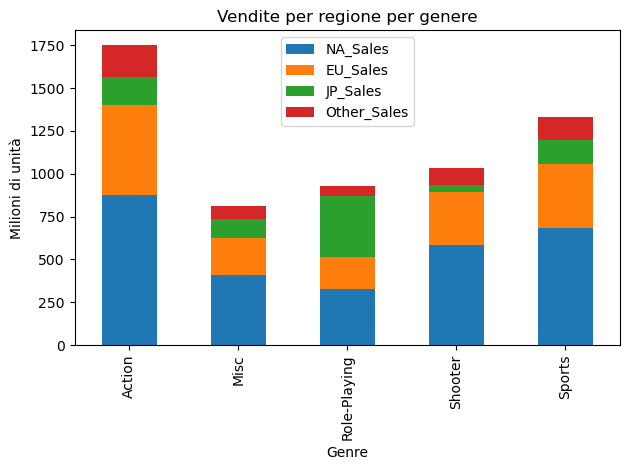


In [26]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [30]:
#Quanti videogiochi sono stati pubblicati
num_giochi = df.shape[0]
print(f"Numero totale di videogiochi pubblicati: {num_giochi}")

Numero totale di videogiochi pubblicati: 16598


C:\Users\conta\AppData\Local\Temp\ipykernel_6060\1379519502.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=generi_conteggio.index, y=generi_conteggio.values, palette='viridis', legend=False)


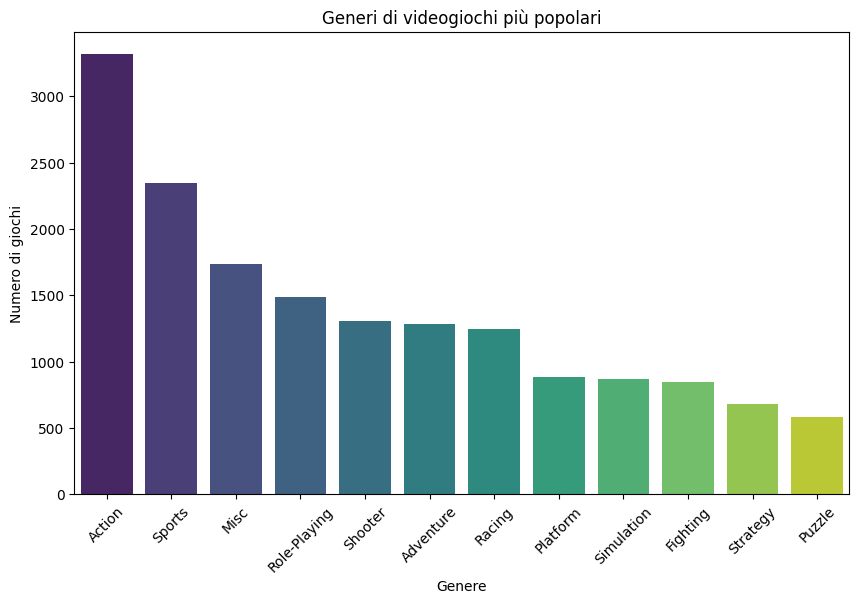

In [41]:
#Quali sono i generi più popolari? Mostralo con un bar plot
generi_conteggio = df['Genre'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=generi_conteggio.index, y=generi_conteggio.values, palette='viridis', legend=False)
plt.title('Generi di videogiochi più popolari')
plt.xlabel('Genere')
plt.ylabel('Numero di giochi')
plt.xticks(rotation=45)
plt.show()

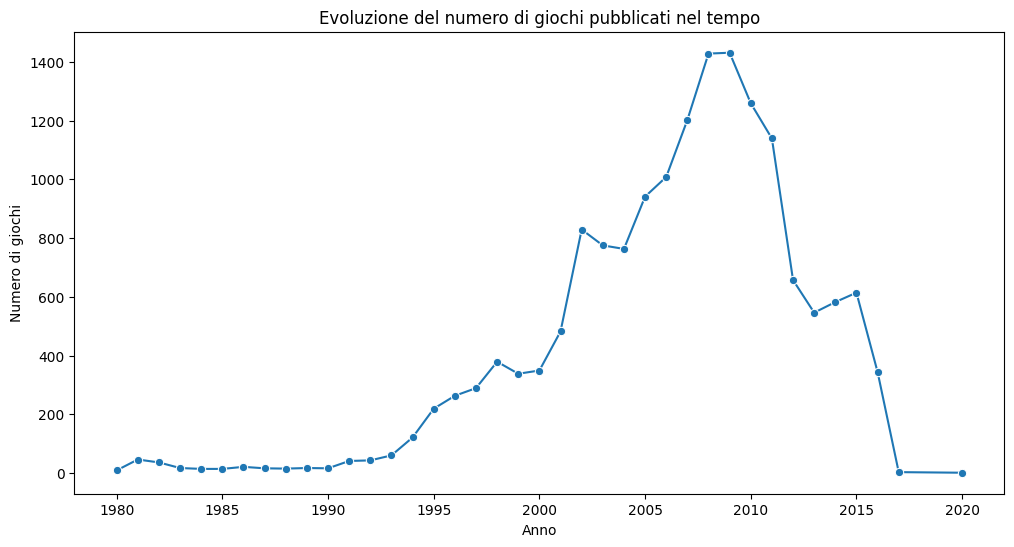

In [ ]:
#Plotta l'evoluzione del numero di giochi pubblicati nel tempo
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
#elimino valori mancanti
df_year = df.dropna(subset=['Year'])
df_year
#raggruppo i giochi per anno
grouped = df_year.groupby('Year')
#ottengo grouped = raggruppa tutte pe righe del df con lo stesso anno
#conto quanti videogiochi ci sono in ogni gruppo (anno)
giochi = grouped['Name'].count() #giochi è una Series 

plt.figure(figsize=(12,6))
sns.lineplot(x=giochi.index, y=giochi.values, marker='o')
plt.title('Evoluzione del numero di giochi pubblicati nel tempo')
plt.xlabel('Anno')
plt.ylabel('Numero di giochi')
plt.show()

In [62]:
#Prova a riprodurre questo plot
grouped = df.groupby('Genre')
generi_conteggio = grouped['Name'].count().reset_index()
generi_conteggio
generi_conteggio.columns =['Genre', 'Count']

regioni = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df_long = df.melt(id_vars=['Genre'], value_vars=regioni, 
                  var_name='Region', value_name='Sales')

# Raggruppiamo per genere e regione (sommiamo le vendite)
generi_regioni = df_long.groupby(['Genre','Region'])['Sales'].sum().reset_index()


plt.figure(figsize=(12,6))
sns.barplot( x='Genre', y='Count', hue='Region', data=generi_conteggio)
plt.xticks(rotation=45)
plt.title("Conteggio per genere")
plt.show()

ValueError: Could not interpret value `Region` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>